In [1]:
#classification with algo

# Importing Libraries
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import numpy as np
import pandas as pd
import imblearn
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('F:/dataset/bank-full.csv')


In [3]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
dataset.shape

(45211, 17)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


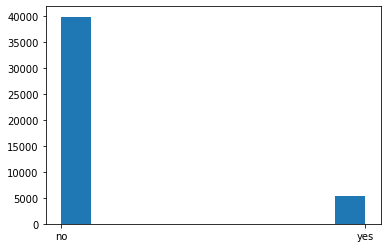

In [6]:
plt.hist(dataset.y)

plt.show()

In [7]:
print(dataset['y'].unique())

['no' 'yes']


In [8]:
dataset['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [10]:
#dataset['default'].value_counts()

In [7]:
new_dataset = dataset.drop(['contact','day', 'month', 'duration', 'campaign','pdays', 'previous'], axis = 1)

In [10]:
new_dataset

,age,job,marital,education,default,balance,housing,loan,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,unknown,no


In [11]:
x = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 9].values

In [12]:
x

array([[58, 'management', 'married', ..., 2143, 'yes', 'no'],
       [44, 'technician', 'single', ..., 29, 'yes', 'no'],
       [33, 'entrepreneur', 'married', ..., 2, 'yes', 'yes'],
       ...,
       [72, 'retired', 'married', ..., 5715, 'no', 'no'],
       [57, 'blue-collar', 'married', ..., 668, 'no', 'no'],
       [37, 'entrepreneur', 'married', ..., 2971, 'no', 'no']],
      dtype=object)

In [14]:
enc_onehot = OneHotEncoder()

x=enc_onehot.fit_transform(new_dataset[['job','marital', 'education','default', 'housing', 'loan', 'poutcome']]).toarray()


In [15]:
x

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [16]:
x.shape

(45211, 29)

In [17]:
enc_label = LabelEncoder()

y = enc_label.fit_transform(new_dataset['y'])

In [18]:
y.shape

(45211,)

In [19]:
new_dataset

,age,job,marital,education,default,balance,housing,loan,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,unknown,no


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_s=sc.fit_transform(x_train)
x_test_s=sc.transform(x_test)

In [22]:
# Fitting Decision Tree Classification to the Training Set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train_s, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
# Predicting the Test set results
y_pred=classifier.predict(x_test_s)
print(y_pred)

[0 0 0 ... 0 0 0]


In [24]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('-----------------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.89


Confusion Matrix:
[[7866  114]
 [ 901  162]] 


-----------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7980
           1       0.59      0.15      0.24      1063

    accuracy                           0.89      9043
   macro avg       0.74      0.57      0.59      9043
weighted avg       0.86      0.89      0.86      9043



In [25]:
from sklearn.metrics import plot_confusion_matrix

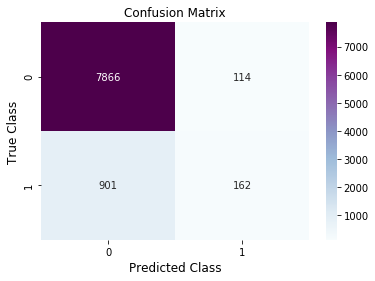

In [26]:
ax = sns.heatmap(cm, cmap = 'BuPu',  annot=True, fmt='d')
                 
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)    
                 
plt.show()

In [27]:
from sklearn.model_selection import  cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

In [28]:
accuracies

array([0.88968759, 0.88885817, 0.89217584, 0.89106995, 0.89272878,
       0.89825823, 0.89272878, 0.89272878, 0.88855088, 0.88855088])

In [30]:
conda install -c conda-forge imbalanced-learn 

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda




In [31]:
import imblearn

In [32]:
from imblearn.over_sampling import SMOTE

resampler = SMOTE(random_state = 0)
x_train_smote, y_train_smote = resampler.fit_resample(x_train, y_train)

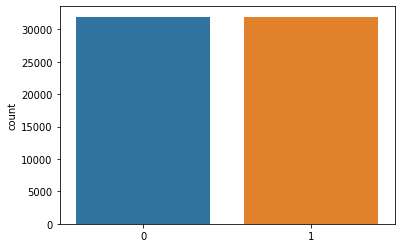

In [33]:
sns.countplot(x=y_train_smote)

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sm=sc.fit_transform(x_train_smote)
x_test_sm=sc.transform(x_test)

In [35]:
# Fitting Decision Tree Classification to the Training Set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train_sm, y_train_smote)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
# Predicting the Test set results
y_pred=classifier.predict(x_test_sm)

In [37]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('-----------------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.75


Confusion Matrix:
[[6207 1773]
 [ 529  534]] 


-----------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      7980
           1       0.23      0.50      0.32      1063

    accuracy                           0.75      9043
   macro avg       0.58      0.64      0.58      9043
weighted avg       0.84      0.75      0.78      9043



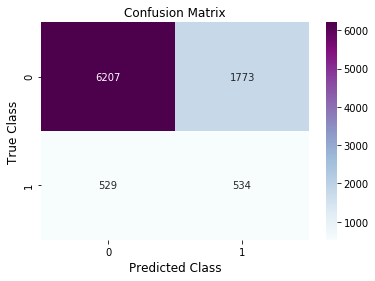

In [38]:
ax = sns.heatmap(cm, cmap = 'BuPu',  annot=True, fmt='d')
                 
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)    
                 
plt.show()